## Normal Equation & Linear Reg

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.09256853],
       [2.90657285]])

In [4]:
X_new = np.array([[0], [2]])

In [5]:
X_new

array([[0],
       [2]])

In [6]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [7]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.09256853],
       [9.90571423]])

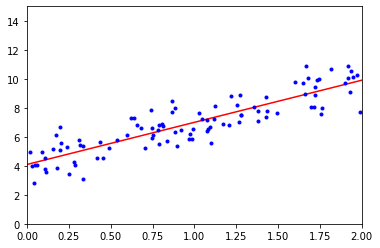

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.09256853]), array([[2.90657285]]))

In [11]:
lin_reg.predict(X_new)

array([[4.09256853],
       [9.90571423]])

## Batch GD

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.09256853],
       [2.90657285]])

## Stochastic GD

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [15]:
theta

array([[4.08114441],
       [2.86938584]])

In [16]:
#Using sklearn

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13496071]), array([2.96813777]))

## Polynomial Reg.

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

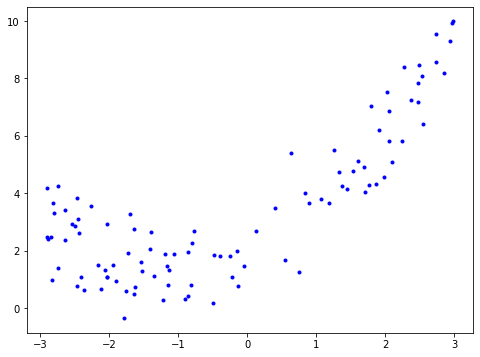

In [19]:
plt.figure(figsize=(8,6))
plt.plot(X,y, 'b.')
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X[0]

array([-2.03446192])

In [22]:
X_poly[0]

array([-2.03446192,  4.13903532])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.91924334]), array([[1.08284527, 0.49287497]]))

## Learning Curves

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [25]:
def plot_learning_curves_two(model, X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.figure(figsize=(8,6))
    plt.ylim(0,5)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()

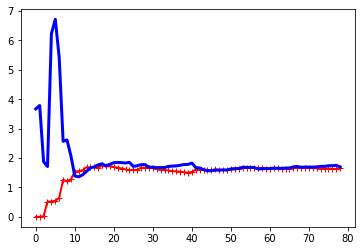

In [26]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

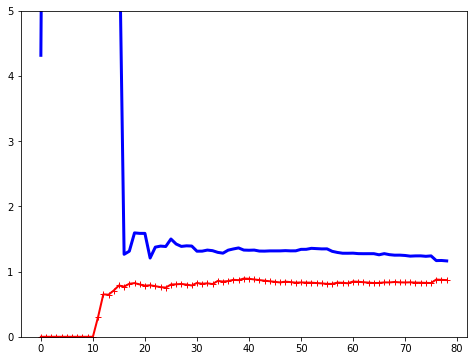

In [27]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves_two(polynomial_regression, X, y)

## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.28675908]])

In [29]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.2307174])

## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.24240209])

## Elastic Net

In [46]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ration is the "mixing parameter" r from the textbook
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.03795007])

## Early Stopping

In [47]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# prepare the data
poly_scaler = Pipeline([
("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A

/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A

/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A

/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nilose/Documents/Data-Science/ml/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A

## Decision Boundaries

In [31]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [32]:
X = iris["data"][:, 3:] # petal width

In [33]:
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

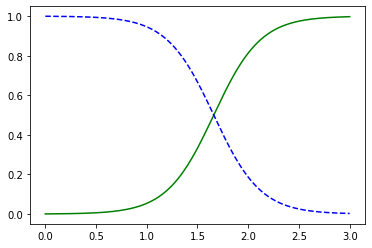

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

## Softmax Regression

In [36]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [37]:
softmax_reg.predict([[5, 2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercises

1. Which Linear Regression training algorithm can you use if you have a training
set with millions of features?
2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?
3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?
4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?
5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?
6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?
7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?
8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?
9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?
10. Why would you want to use:
a. Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
b. Lasso instead of Ridge Regression?
c. Elastic Net instead of Lasso?
11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?
12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

### Exercise 12

In [39]:
#Let's use the iris dataset

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [40]:
K = 3 #number of classes
m = len(X) #numb of instances (flowers)

In [41]:
m

150

In [42]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [43]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [44]:
type(X)

numpy.ndarray

In [45]:
type(y)

numpy.ndarray

In [46]:
#first let's scale the features

np.mean(X)

2.4786666666666672

In [47]:
X[0]

array([1.4, 0.2])

In [48]:
X[:][0]

array([1.4, 0.2])

In [49]:
X[1][0]

1.4

In [50]:
means = np.mean(X, axis=0)

In [51]:
means

array([3.758     , 1.19933333])

In [52]:
std = np.std(X, axis=0)

In [53]:
std

array([1.75940407, 0.75969263])

In [54]:
X_scaled = (X-means)/std
X_scaled

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

In [55]:
theta = np.random.rand(2,3) # creates an 2x3 array for theta, with random initial values,
                            #with two rows (n=2) and three columns(k=3)
theta

array([[0.1495259 , 0.81042702, 0.27255933],
       [0.28585022, 0.88559464, 0.95905777]])

In [56]:
scores = X_scaled.dot(theta)
scores

array([[-0.57641862, -2.25110621, -1.62687831],
       [-0.57641862, -2.25110621, -1.62687831],
       [-0.58491729, -2.2971688 , -1.64236988],
       [-0.56791996, -2.20504362, -1.61138674],
       [-0.57641862, -2.25110621, -1.62687831],
       [-0.47566844, -1.87977294, -1.32791786],
       [-0.53879154, -2.13453345, -1.50063544],
       [-0.56791996, -2.20504362, -1.61138674],
       [-0.57641862, -2.25110621, -1.62687831],
       [-0.60554705, -2.32161638, -1.7376296 ],
       [-0.56791996, -2.20504362, -1.61138674],
       [-0.55942129, -2.15898104, -1.59589517],
       [-0.61404571, -2.36767897, -1.75312118],
       [-0.63954172, -2.50586673, -1.79959589],
       [-0.59341596, -2.34323138, -1.65786145],
       [-0.49266578, -1.97189811, -1.358901  ],
       [-0.50966311, -2.06402328, -1.38988414],
       [-0.53879154, -2.13453345, -1.50063544],
       [-0.51329553, -1.99634569, -1.45416073],
       [-0.53029287, -2.08847087, -1.48514387],
       [-0.55092262, -2.11291845, -1.580

In [57]:
len(scores)

150

In [58]:
exp_scores = np.exp(scores)

In [59]:
exp_scores

array([[ 0.56190717,  0.1052827 ,  0.19654216],
       [ 0.56190717,  0.1052827 ,  0.19654216],
       [ 0.55715194,  0.1005431 ,  0.19352088],
       [ 0.56670298,  0.11024572,  0.19961061],
       [ 0.56190717,  0.1052827 ,  0.19654216],
       [ 0.6214695 ,  0.15262476,  0.26502851],
       [ 0.58345291,  0.11829977,  0.22298842],
       [ 0.56670298,  0.11024572,  0.19961061],
       [ 0.56190717,  0.1052827 ,  0.19654216],
       [ 0.54577578,  0.09811487,  0.17593695],
       [ 0.56670298,  0.11024572,  0.19961061],
       [ 0.57153972,  0.11544269,  0.20272697],
       [ 0.54115707,  0.09369795,  0.17323241],
       [ 0.52753413,  0.08160484,  0.1653657 ],
       [ 0.55243696,  0.09601687,  0.19054604],
       [ 0.61099544,  0.1391924 ,  0.256943  ],
       [ 0.60069791,  0.12694222,  0.24910416],
       [ 0.58345291,  0.11829977,  0.22298842],
       [ 0.59851988,  0.13583074,  0.23359633],
       [ 0.58843261,  0.12387641,  0.22646976],
       [ 0.57641775,  0.12088466,  0.205

In [60]:
len(np.sum(exp_scores, axis=1))

150

In [61]:
sum_exp_scores = np.sum(exp_scores, axis=1)
sum_exp_scores

array([ 0.86373203,  0.86373203,  0.85121592,  0.87655931,  0.86373203,
        1.03912277,  0.9247411 ,  0.87655931,  0.86373203,  0.81982759,
        0.87655931,  0.88970939,  0.80808743,  0.77450467,  0.83899986,
        1.00713085,  0.97674429,  0.9247411 ,  0.96794696,  0.93877878,
        0.90319439,  1.00713085,  0.81542571,  1.1174844 ,  0.93122035,
        0.88970939,  1.02291859,  0.87655931,  0.86373203,  0.88970939,
        0.88970939,  1.00713085,  0.81982759,  0.86373203,  0.87655931,
        0.83899986,  0.85121592,  0.80808743,  0.85121592,  0.87655931,
        0.91105012,  0.91105012,  0.85121592,  1.18430198,  1.07284493,
        0.9247411 ,  0.88970939,  0.86373203,  0.87655931,  0.86373203,
        4.6090386 ,  4.83064051,  5.3809853 ,  3.49619474,  4.96061735,
        3.96274624,  5.64052127,  2.25848177,  4.06668349,  3.757438  ,
        2.35851374,  4.46824949,  2.64036755,  4.6090386 ,  3.17838738,
        4.26025514,  4.83064051,  2.70282467,  4.83064051,  2.82

In [63]:
a = 1/sum_exp_scores

In [66]:
b = np.c_[a,a]
c = np.c_[b,a]
c

array([[1.1577665 , 1.1577665 , 1.1577665 ],
       [1.1577665 , 1.1577665 , 1.1577665 ],
       [1.17479006, 1.17479006, 1.17479006],
       [1.14082411, 1.14082411, 1.14082411],
       [1.1577665 , 1.1577665 , 1.1577665 ],
       [0.96235019, 0.96235019, 0.96235019],
       [1.08138375, 1.08138375, 1.08138375],
       [1.14082411, 1.14082411, 1.14082411],
       [1.1577665 , 1.1577665 , 1.1577665 ],
       [1.21976865, 1.21976865, 1.21976865],
       [1.14082411, 1.14082411, 1.14082411],
       [1.12396251, 1.12396251, 1.12396251],
       [1.23748986, 1.23748986, 1.23748986],
       [1.2911478 , 1.2911478 , 1.2911478 ],
       [1.19189531, 1.19189531, 1.19189531],
       [0.99291964, 0.99291964, 0.99291964],
       [1.02380941, 1.02380941, 1.02380941],
       [1.08138375, 1.08138375, 1.08138375],
       [1.03311446, 1.03311446, 1.03311446],
       [1.06521368, 1.06521368, 1.06521368],
       [1.10718137, 1.10718137, 1.10718137],
       [0.99291964, 0.99291964, 0.99291964],
       [1.

In [76]:
prob = np.multiply(exp_scores, c)

In [77]:
prob

array([[0.65055729, 0.12189278, 0.22754993],
       [0.65055729, 0.12189278, 0.22754993],
       [0.65453656, 0.11811703, 0.2273464 ],
       [0.64650843, 0.12577097, 0.2277206 ],
       [0.65055729, 0.12189278, 0.22754993],
       [0.59807129, 0.14687846, 0.25505024],
       [0.6309365 , 0.12792745, 0.24113605],
       [0.64650843, 0.12577097, 0.2277206 ],
       [0.65055729, 0.12189278, 0.22754993],
       [0.66572019, 0.11967744, 0.21460237],
       [0.64650843, 0.12577097, 0.2277206 ],
       [0.64238922, 0.12975326, 0.22785752],
       [0.66967639, 0.11595026, 0.21437335],
       [0.68112453, 0.10536391, 0.21351156],
       [0.65844702, 0.11444206, 0.22711093],
       [0.60666938, 0.13820687, 0.25512375],
       [0.61500018, 0.12996464, 0.25503519],
       [0.6309365 , 0.12792745, 0.24113605],
       [0.61833954, 0.14032871, 0.24133175],
       [0.62680647, 0.13195485, 0.24123868],
       [0.63819899, 0.13384124, 0.22795977],
       [0.60666938, 0.13820687, 0.25512375],
       [0.

In [78]:
np.sum(prob, axis=1) #Verifying if it is normalized

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [79]:
len(prob)

150